In [65]:
import nb; reload(nb)
import math

In [66]:
nb1 = nb.NaiveBayes()
nb1.train_model()
#nb1.train_model(num_docs=10)


Starting training with paths ./large_movie_review_dataset/train/pos and ./large_movie_review_dataset/train/neg
REPORTING CORPUS STATISTICS
NUMBER OF DOCUMENTS IN POSITIVE CLASS: 12500.0
NUMBER OF DOCUMENTS IN NEGATIVE CLASS: 12500.0
NUMBER OF TOKENS IN POSITIVE CLASS: 1875650.0
NUMBER OF TOKENS IN NEGATIVE CLASS: 1861010.0
VOCABULARY SIZE: NUMBER OF UNIQUE WORDTYPES IN TRAINING CORPUS: 252165


In [50]:
print round(nb1.p_word_given_label('fantastic', nb.POS_LABEL), 5)
print round(nb1.p_word_given_label('fantastic', nb.NEG_LABEL), 5)
print round(nb1.p_word_given_label('boring', nb.POS_LABEL), 5)
print round(nb1.p_word_given_label('boring', nb.NEG_LABEL), 5)

0.00022
6e-05
9e-05
0.00038


In [51]:
nb1.class_word_counts[nb.POS_LABEL]['categorical']

1.0

In [52]:
nb1.class_word_counts[nb.NEG_LABEL]['categorical']

0.0

In [78]:
pos_words = nb1.class_word_counts[nb.POS_LABEL]
neg_words = nb1.class_word_counts[nb.NEG_LABEL]
for k, v in pos_words.items():
    if k not in neg_words:
        print k
        break

"bolivarian


In [79]:
print round(nb1.p_word_given_label('categorical', nb.POS_LABEL), 10)
print round(nb1.p_word_given_label('categorical', nb.NEG_LABEL), 10)

5.331e-07
0.0


In [44]:
print round(nb1.p_word_given_label_and_psuedocount('"Disappointing"', nb.POS_LABEL, 0), 10)
print round(nb1.p_word_given_label_and_psuedocount('"Disappointing"', nb.NEG_LABEL, 0), 10)
print round(nb1.p_word_given_label_and_psuedocount('"disappointing"', nb.POS_LABEL, 0), 10)
print round(nb1.p_word_given_label_and_psuedocount('"disappointing"', nb.NEG_LABEL, 0), 10)
print round(nb1.p_word_given_label_and_psuedocount('Disappointing', nb.POS_LABEL, 0), 10)
print round(nb1.p_word_given_label_and_psuedocount('Disappointing', nb.NEG_LABEL, 0), 10)
print round(nb1.p_word_given_label_and_psuedocount('Disappointing,', nb.POS_LABEL, 0), 10)
print round(nb1.p_word_given_label_and_psuedocount('Disappointing,', nb.NEG_LABEL, 0), 10)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [81]:
nb1.p_word_given_label_and_psuedocount('categorical', nb.POS_LABEL, 1)

9.399313380157579e-07

In [82]:
nb1.log_likelihood(['categorical'], nb.POS_LABEL, 1)

-13.87745900901434

In [89]:
sum(nb1.class_total_doc_counts.values())

25000.0

In [90]:
nb1.log_prior(nb.NEG_LABEL)

-0.6931471805599453

In [97]:
nb1.classify(['this', 'is', 'fantastic'], 1)

'pos'

In [98]:
nb1.classify(['this', 'is', 'boring'], 1)

'neg'

In [99]:
nb1.classify(['this', 'is', 'fantastic', 'boring'], 1)

'neg'

In [ ]:
nb1.classify(['this', 'is', 'fantastic'], 1)

In [127]:
nb1.evaluate_classifier_accuracy(1)

0.83536

In [128]:
nb1.log_prior('pos')

-0.6931471805599453

In [129]:
nb1.log_prior('neg')

-0.6931471805599453

In [124]:
math.exp(nb1.log_prior('pos'))

0.5

In [17]:
psuedocounts = [x * 0.5 for x in range(1, 21)]
accuracies = []
for c in psuedocounts:
    accuracies.append(nb1.evaluate_classifier_accuracy(c))

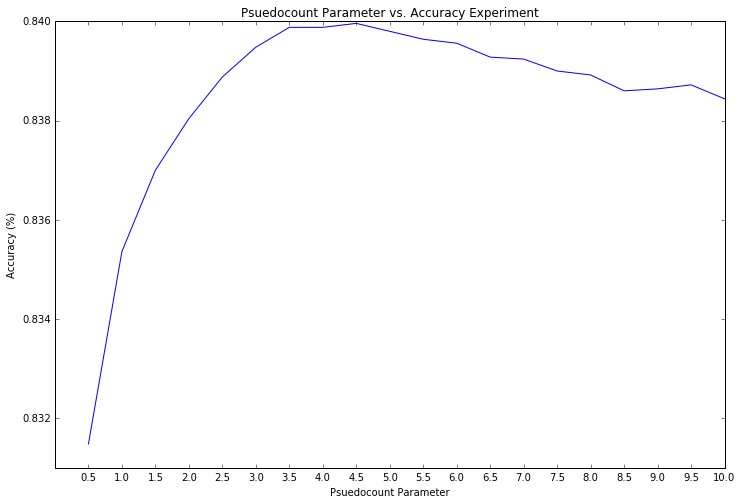

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
plt.plot(psuedocounts, accuracies)
plt.xlabel('Psuedocount Parameter')
plt.ylabel('Accuracy (%)')
plt.title('Psuedocount Parameter vs. Accuracy Experiment')
plt.xticks(psuedocounts)
#plt.show()
plt.savefig('psuedocount_vs_accuracy.pdf')

In [23]:
max_index = accuracies.index(max(accuracies))
psuedocounts[max_index]

4.5

In [60]:
print round(nb1.p_word_given_label('disappointing.', nb.POS_LABEL), 10)
print round(nb1.p_word_given_label('disappointing.', nb.NEG_LABEL), 10)
print round(nb1.p_word_given_label('disappointing', nb.POS_LABEL), 10)
print round(nb1.p_word_given_label('disappointing', nb.NEG_LABEL), 10)
print round(nb1.p_word_given_label('disappointment.', nb.POS_LABEL), 10)
print round(nb1.p_word_given_label('disappointment.', nb.NEG_LABEL), 10)
print round(nb1.p_word_given_label('disappointments', nb.POS_LABEL), 10)
print round(nb1.p_word_given_label('disappointments', nb.NEG_LABEL), 10)
print round(nb1.p_word_given_label('disappoint', nb.POS_LABEL), 10)
print round(nb1.p_word_given_label('disappoint', nb.NEG_LABEL), 10)
print round(nb1.p_word_given_label('disappoint.', nb.POS_LABEL), 10)
print round(nb1.p_word_given_label('disappoint.', nb.NEG_LABEL), 10)
print round(nb1.p_word_given_label('disappointed', nb.POS_LABEL), 10)
print round(nb1.p_word_given_label('disappointed', nb.NEG_LABEL), 10)
print round(nb1.p_word_given_label('great', nb.POS_LABEL), 10)
print round(nb1.p_word_given_label('great', nb.NEG_LABEL), 10)

1.22624e-05
3.97634e-05
2.61243e-05
0.0001053192
1.01298e-05
5.69583e-05
4.2652e-06
3.7614e-06
1.8127e-05
1.02095e-05
9.0635e-06
3.7614e-06
8.85027e-05
0.0001558294
0.0020041052
0.0009634553


In [70]:
print round(nb1.likelihood_ratio('fantastic', 4.5), 10)
print round(nb1.likelihood_ratio('boring', 4.5), 10)

3.634222229
0.2513956625


In [71]:
print round(nb1.likelihood_ratio('the', 4.5), 10)
print round(nb1.likelihood_ratio('to', 4.5), 10)

0.9924898862
0.9751391629
